# L10~11 神经网络和深度学习编程作业

## 第一题 设计神经网络实现对iris数据集的分类
**原题复现**:
- IRIS数据集有三类目标，每个类别有50个样本，每个样本有四维特征。自行设计神经网络实现对这三个目标的识别，实验时每个类别随机选30个样本进行训练，另外20个样本用于测试。希望能通过设计不同的隐含层数、每层的节点数、不同的学习率、不同的激活函数等对实验结果进行讨论。
**导入相关库**:
- 为了实现神经网络的设计，我们需要使用一些成熟的深度学习框架，这里我们使用PyTorch框架来实现神经网络的设计。Pytorch 是一个基于 Python 的科学计算库，它有以下特点：
    - 类似于 NumPy，但是它可以使用 GPU
    - 动态神经网络
    - 高度模块化
    - 可扩展性强
    - 用于科学计算
    - 适用于深度学习
- 本次作业我们使用PyTorch来实现神经网络的设计，因此需要导入PyTorch相关的库，同时也需要导入numpy库和matplotlib库,以及sklearn库中的iris数据集。
**数据准备**:
- 本次作业我们使用sklearn库中的iris数据集，iris数据集是一个经典的分类数据集，数据集中包含了150个样本，分为3类，每类50个数据，每个数据包含4个属性，分别是花萼长度、花萼宽度、花瓣长度、花瓣宽度，目标值为0、1、2，分别代表3个类别的鸢尾花。
- 按照梯目要求，我们在每类50个中选30个作为训练集，另外20个作为测试集，因此我们需要对数据集进行划分，这里我们借助random库中的sample函数来实现数据集的划分。
- 对数据可以进行特征标准化，这里我们使用sklearn库中的StandardScaler函数来实现数据的标准化。
- 为了能够在PyTorch中使用数据，我们需要将数据转换为Tensor类型，这里我们使用torch.FloatTensor函数与torch.LongTensor函数来实现数据类型的转换。
**模型搭建**:
- 定义神经网络模型`Net`，这个模型是一个前馈神经网络，包括三个全连接层(`nn.Linear`)，第一个全连接层的输入为4维，第二个层有16个隐藏单元第三个层有8个隐藏单元，最后的输出层有3个输出单元，对应于Iris数据集的三个类别。中间层使用的激活函数为ReLU函数.
- 初始化模型(`model`)与损失函数(`criterion`)，模型初始化为`Net()`实例，损失函数则初始化为交叉熵损失函数(`nn.CrossEntropyLoss()`)。这个损失函数适用于多分类问题。另外，我们还设置了优化器(`optimizer`)，这里使用的优化器应用了Adam算法，并将学习率设置成了0.001.
**模型训练**:
- 进行循环训练，迭代次数为100，每次迭代时进行以下操作：
  - 通过调用`optimizer.zero_grad()`来将优化器的梯度缓冲区清零。
  - 通过调用`model(X_train)`来获取模型的预测输出。
  - 使用交叉熵损失函数计算损失，即模型的输出与实际类别之间的差距。
  - 调用`loss.backward()`来计算梯度。
  - 调用`optimizer.step()`来执行参数更新，以减小损失。
**模型测试**:
- 模型训练完成后，我们使用测试集来测试模型的性能。使用`torch_no_grad`禁用梯度计算，并执行下列操作:
  - 通过调用`model(X_test)`来获取模型的预测输出。
  - 通过调用`torch.max`函数来获取每个样本的预测类别。与真实标签进行比较，计算准确率。
  - 输出模型在测试集上的准确率。

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
  
# 加载IRIS数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分数据集
n_samples = len(y)
random_indices = random.sample(range(n_samples), n_samples)
X_shuffled = X[random_indices]
y_shuffled = y[random_indices]
train_indices = []
test_indices = []
for class_label in np.unique(y_shuffled):
    indices = np.where(y_shuffled == class_label)[0]
    train_indices.extend(indices[:30])
    test_indices.extend(indices[30:50])
X_train = X_shuffled[train_indices]
y_train = y_shuffled[train_indices]
X_test = X_shuffled[test_indices]
y_test = y_shuffled[test_indices]

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化模型和优化器
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用Adam优化器

# 训练模型
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

# 预测并评估模型
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test, predicted.numpy())

print(f"Test Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 90.00%


## 第二题 设计LeNet实现对MNIST数据集的分类
**原题复现**:
LeNet网络结构如下：
- （i）第1层卷积层Conv-1： 6个5*5*1大小的滤波器， stride=1，padding=2，接Sigmoid做激活函数；
- （ii）接下来是池化层AvePool-1，它以2*2、stride=2做Average Pooling操作；
- （iii）第2层卷积层Conv-2： 16个5*5*6大小的滤波器， stride=1，padding=0，接Sigmoid做激活函数；
- （iv）再接一个池化层AvePool--2，它以2*2、stride=2做Average Pooling操作；
- （v）对AvePool--2层输出做了Flatten操作后，与120个神经元做全连接，构成FC-1，Sigmoid做激活函数；
- （vi）再与84个神经元做全连接，构成FC-2，Sigmoid做激活函数；
- （vii）再全连接10个神经元输出，用Softmax完成10个类别的分类。
编写上述网络结构的代码，对MNIST数据集实现分类，训练时的batch size为256，一共训练10遍epoch，画出训练时的损失函数、训练集上的分类精度和测试集上的分类精度随epoch增加的变化曲线。训练完成后，在测试集上随机抽取10个样本，观察分类结果。</br>

**导入相关库**:
根据题目要求，我们需要导入PyTorch库，同时也需要导入numpy库和matplotlib库,以及sklearn库中的MNIST数据集。关于PyTorch库的介绍，可以参考第一题的相关介绍。

**数据准备**:
- 设置随机种子，这里我们设置随机种子为42，这样可以保证每次运行代码时，生成的随机数都是一样的。
- 加载MNIST数据集并进行数据处理。MNIST数据集是一个经典的手写数字识别数据集，数据集中包含了60000个训练样本和10000个测试样本，每个样本为28*28的灰度图像，对应一个0~9的数字。我们可以使用torchvision库中的datasets函数来加载MNIST数据集。这里我们使用`transforms.Compose`定义数据预处理管道，包括将图像转换为张量和对图像进行归一化，从而将像素范围从[0, 255]缩放到[-1, 1]。
- 创建`trainset`和`testset`,分别用于存储训练集和测试集。
- 使用`DataLoader`函数将数据集划分为小批次，`trainloader`和`testloader`分别用于训练和测试。

**模型搭建**:
- 按照题目要求定义LeNet神经网络结构：
  - 首先是第1层卷积层Conv-1： 6个5*5*1大小的滤波器， stride=1，padding=2，接Sigmoid做激活函数；因此用` self.conv1 = nn.Conv2d(1, 6, 5, padding=2)`,接受灰度图像，输出6个通道的特征图。卷积核大小为5*5，带2像素的填充。
  - 接下来是池化层AvePool-1，它以2*2、stride=2做Average Pooling操作；因此用`self.pool = nn.AvgPool2d(2, stride=2)`，池化核大小为2*2，步长为2。
  - 再接下来是第2层卷积层Conv-2： 16个5*5*6大小的滤波器， stride=1，padding=0，接Sigmoid做激活函数；因此用`self.conv2 = nn.Conv2d(6, 16, 5)`，接受6个通道的特征图，输出16个通道的特征图。卷积核大小为5*5，不带填充。
  - 再接一个池化层AvePool--2，它以2*2、stride=2做Average Pooling操作；因此用`self.pool = nn.AvgPool2d(2, stride=2)`，池化核大小为2*2，步长为2。
  - 然后是三个全连接层，分别是FC-1、FC-2和FC-3，这里我们使用`nn.Linear`函数来定义全连接层，FC-1的输入为16*5*5，输出为120，FC-2的输入为120，输出为84，FC-3的输入为84，输出为10。
- 初始化LeNet模型(net)和损失函数(criterion)，以及优化器(optimizer)。优化器使用随机梯度下降（SGD），学习率为0.01。

**模型训练**:
- 进行训练循环，共训练10个epoch。在每个周期中，执行以下操作：
  - 将优化器的梯度缓冲区清零。
  - 遍历训练数据集，获取输入图像和标签。
  - 通过LeNet模型前向传播，获得预测输出。
  - 计算损失，使用交叉熵损失函数来度量模型的输出与真实标签之间的差距。
  - 执行反向传播，计算梯度并更新模型参数。
  - 记录每个批次的损失，计算并存储整体样本的平均损失。
- 绘制损失函数曲线，显示损失随训练周期的变化。

**模型测试**:
- 将模型设置为评估模式，禁用梯度计算。然后进行后续评估:
  - 创建空列表y_true和y_pred来存储真实标签和模型预测的标签。
  - 使用torch.no_grad()，遍历测试集，进行预测
  - 使用accuracy_score函数来计算预测准确度
  - 输出正确率。

**结果可视化**:
- 随机抽取10个样本，观察分类结果。先随机选取索引，再获取样本数据、输入图像、真实标签和模型的预测结果。最后使用Matplotlib将图像和相关信息绘制在子图中，包括图像、预测标签和实际标签。


C:\Users\spicycurryz\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Epoch 1/10, Loss: 2.2777
Epoch 2/10, Loss: 2.0431
Epoch 3/10, Loss: 0.8742
Epoch 4/10, Loss: 0.5210
Epoch 5/10, Loss: 0.4259
Epoch 6/10, Loss: 0.3682
Epoch 7/10, Loss: 0.3321
Epoch 8/10, Loss: 0.3022
Epoch 9/10, Loss: 0.2777
Epoch 10/10, Loss: 0.2575


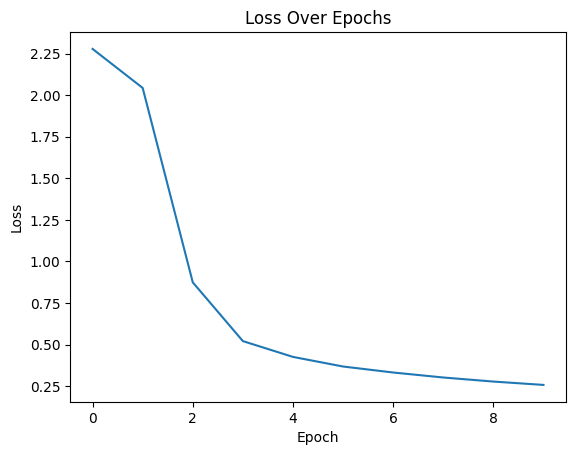

Test Accuracy: 92.89%


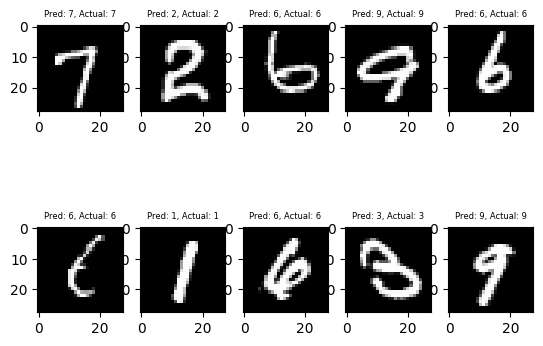

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# 定义LeNet网络结构
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)  # 第1层卷积层
        self.pool1 = nn.AvgPool2d(2, stride=2)  # 第1层池化层
        self.conv2 = nn.Conv2d(6, 16, 5)  # 第2层卷积层
        self.pool2 = nn.AvgPool2d(2, stride=2)  # 第2层池化层
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # FC-1
        self.fc2 = nn.Linear(120, 84)  # FC-2
        self.fc3 = nn.Linear(84, 10)  # 输出层

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # 使用ReLU激活函数
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 设置随机种子
torch.manual_seed(42)

# 加载MNIST数据集并进行数据预处理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=False)

# 初始化LeNet模型和优化器
net = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 训练模型
losses = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss / (i + 1))
    print(f"Epoch {epoch + 1}/{10}, Loss: {running_loss / (i + 1):.4f}")

# 绘制损失函数曲线
plt.plot(losses)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 预测并评估模型
net.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 随机抽取10个样本观察分类结果
sample_indices = np.random.choice(len(testset), 10)
sample_data = [testset[i] for i in sample_indices]
sample_inputs = torch.stack([data[0] for data in sample_data])
sample_labels = [data[1] for data in sample_data]
sample_outputs = net(sample_inputs)
_, sample_predicted = torch.max(sample_outputs, 1)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_inputs[i][0], cmap='gray')
    plt.title(f'Pred: {sample_predicted[i]}, Actual: {sample_labels[i]}',fontsize = 6)

plt.show()


根据上述结果，准确率还是比较高的。给出的十个随机样本均判断正确。

## 总结思考
本次编程作业与深度学习和神经网络的内容相关，我们利用PyTorch框架来实现神经网络的设计，实现了对iris数据集和MNIST数据集的分类。通过本次作业，我对神经网络的设计有了更深入的理解，对神经网络每一层的作用认识更加深刻，同时也对PyTorch框架有了更深入的了解，进一步接触了经典的数据集。我认识到，研究学习好Pytorch,Tenserflow等框架,对于我们学好深度学习,理解深度学习的原理,有着非常重要的作用。